In [1]:
from astropy.table import Table, hstack
import numpy as np
import matplotlib.pyplot as plt
import desimodel.io
from astropy.time import Time

%matplotlib inline

In [2]:
tiles = desimodel.io.load_tiles()
print(set(tiles['OBSCONDITIONS'][tiles['PROGRAM']=='BRIGHT']))

{4}


In [3]:
t_start = Time('2020-05-15 00:00:00', scale='utc')
t_end = Time('2020-06-15 00:00:00', scale='utc')
print(t_start.mjd, t_end.mjd)

58984.0 59015.0


In [4]:
filename = '/project/projectdirs/desi/datachallenge/surveysim2018/weather/012/exposures.fits'
data = Table.read(filename, hdu=1)
ii = (data['MJD'] > t_start.mjd) & (data['MJD']<t_end.mjd)
print(np.count_nonzero(ii))
unique_tile_id = list(set(data['TILEID'][ii]))
print(len(unique_tile_id))

807
351


In [5]:
jj = np.in1d(tiles['TILEID'], unique_tile_id)

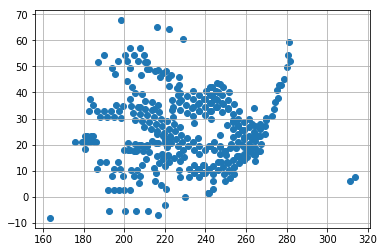

In [6]:
plt.scatter(tiles['RA'][jj], tiles['DEC'][jj])
plt.grid()

In [7]:
set(tiles['PASS'][jj])

{0, 1, 2, 3, 4, 5, 6}

In [8]:
set(tiles['PASS'][tiles['PROGRAM']=='BRIGHT'])

{5, 6, 7}

In [9]:
kk = (tiles['RA'] > 250) & (tiles['RA']<270) & (tiles['DEC']>20.0) & (tiles['DEC']<30) 
kk &= tiles['PASS']==0
print(np.count_nonzero(kk))
print(set(tiles['PASS'][kk]))
pattern = tiles[kk].copy()


24
{0}


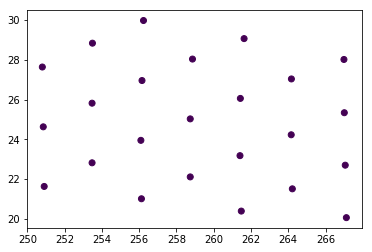

In [10]:
plt.scatter(pattern['RA'], pattern['DEC'], c=pattern['PASS'])

In [11]:
delta_ra = 1.0
delta_dec = 0.01
l = list()
for i_pass in range(20):
    tmp_pattern = pattern.copy()
    tmp_pattern['RA'] = pattern['RA'] + i_pass*delta_ra
    tmp_pattern['DEC'] = pattern['DEC'] + i_pass*delta_dec
    tmp_pattern['PASS'] = i_pass
    l.append(tmp_pattern.copy())
#print(l)
full_pattern = np.concatenate(l)
n_tiles = len(full_pattern)
full_pattern['TILEID'] = np.arange(n_tiles, dtype='int')
ii_pass = full_pattern['PASS']>=10
full_pattern['PROGRAM'][ii_pass] = 'BRIGHT'
full_pattern['OBSCONDITIONS'][ii_pass] = 4

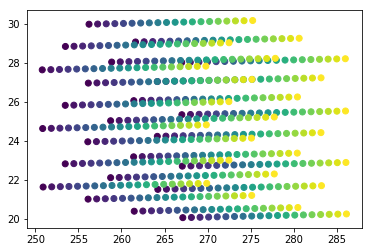

In [12]:
plt.scatter(full_pattern['RA'], full_pattern['DEC'], c=full_pattern['PASS'])

In [13]:
Table(full_pattern).write('')

array([ (  0,  250.85,  24.63,  0, 1,  0.05183758,  1.03568041,  3275.60742188,  1.43221354, b'DARK', 1),
       (  1,  258.86,  28.04,  0, 1,  0.04816191,  1.0286535 ,  4796.15869141,  1.38867104, b'DARK', 1),
       (  2,  256.23,  29.98,  0, 1,  0.04787814,  1.02631271,  4035.32373047,  1.38233352, b'DARK', 1),
       (  3,  253.49,  28.84,  0, 1,  0.04741981,  1.02754414,  3397.33618164,  1.3805517 , b'DARK', 1),
       (  4,  250.8 ,  27.64,  0, 1,  0.06374636,  1.02928424,  3083.7512207 ,  1.52796197, b'DARK', 1),
       (  5,  253.47,  25.82,  0, 1,  0.06377419,  1.03280127,  3535.4777832 ,  1.53475094, b'DARK', 1),
       (  6,  256.15,  26.96,  0, 1,  0.05631372,  1.03047383,  4219.47070312,  1.46251273, b'DARK', 1),
       (  7,  261.63,  29.07,  0, 1,  0.04439174,  1.02726269,  5024.57080078,  1.35488558, b'DARK', 1),
       (  8,  266.99,  28.02,  0, 1,  0.05570964,  1.02868378,  6400.76367188,  1.45398366, b'DARK', 1),
       (  9,  267.01,  25.34,  0, 1,  0.07180158,  1.0